In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


### 📂 Dataset

**Kaggle Competition:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [112]:
df = pd.read_csv("train.csv")

In [113]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [115]:
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']]
df.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000


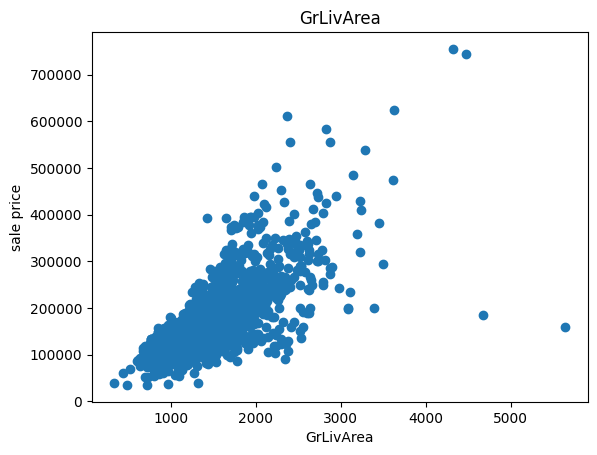

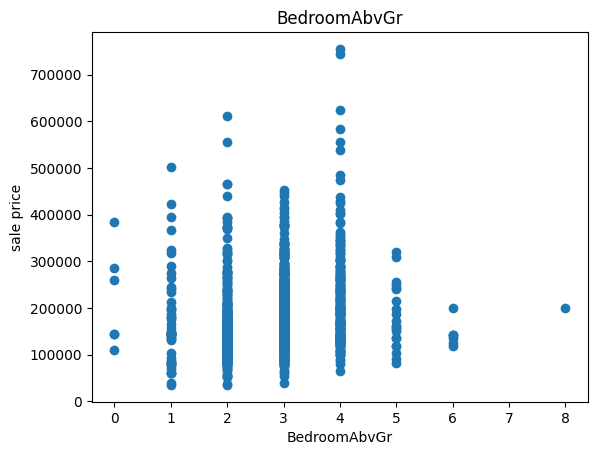

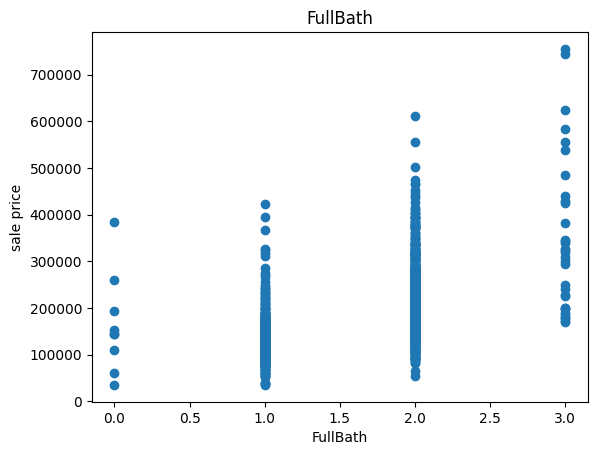

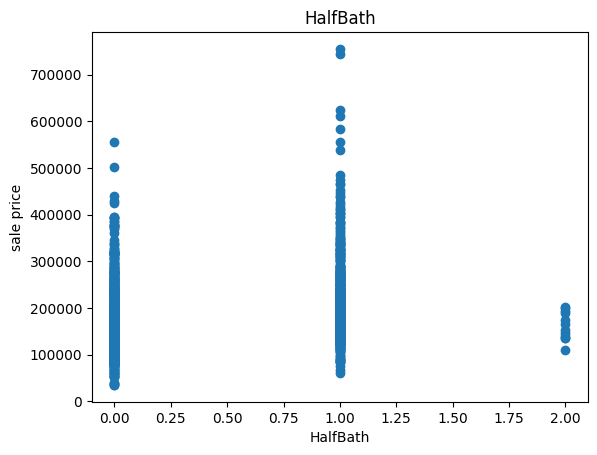

In [116]:
for label in df.columns[:-1]:
    plt.scatter(df[label], df["SalePrice"])
    plt.title(label)
    plt.ylabel("sale price")
    plt.xlabel(label)
    plt.show()

# Train/valid/test dataset

In [117]:
train, val, = np.split(df.sample(frac=1), [ int(0.8*len(df)) ])

c:\Users\ADM\Documents\projects\PRODIGY TASKS\PRODIGY_ML_01\env\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [118]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    Y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X, Y))

    return data, X, Y

In [119]:
_, X_train_GrLivArea, Y_train_GrLivArea = get_xy(train, "SalePrice", x_labels=["GrLivArea"])
_, X_val_GrLivArea, Y_val_GrLivArea = get_xy(val, "SalePrice", x_labels=["GrLivArea"])


In [120]:
GrLivArea_reg = LinearRegression()
GrLivArea_reg.fit(X_train_GrLivArea, Y_train_GrLivArea)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
GrLivArea_reg.score(X_val_GrLivArea, Y_val_GrLivArea)

0.5157257692433741

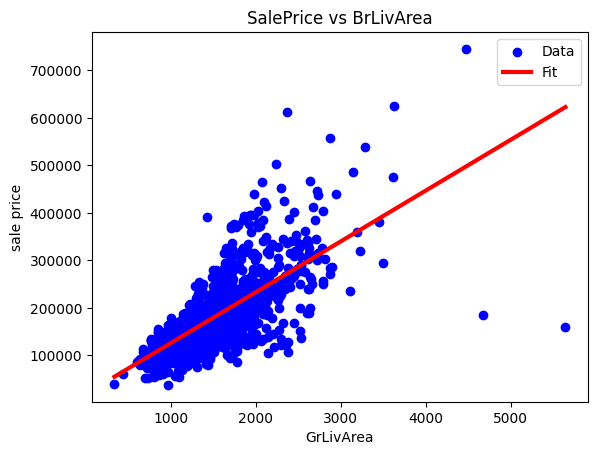

In [122]:
plt.scatter(X_train_GrLivArea, Y_train_GrLivArea, label="Data", color="blue")
x = tf.linspace(X_train_GrLivArea.min(), X_train_GrLivArea.max(), 100)
plt.plot(x, GrLivArea_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("SalePrice vs BrLivArea")
plt.ylabel("sale price")
plt.xlabel("GrLivArea")
plt.show()

# Multiple Linear Regression

In [123]:
train, val, = np.split(df.sample(frac=1), [ int(0.8*len(df)) ])
test = pd.read_csv("test.csv")
test_result = pd.read_csv("sample_submission.csv")
_, X_train_all, Y_train_all = get_xy(train, "SalePrice")
_, X_val_all, Y_val_all = get_xy(val, "SalePrice")
X_test_all = test[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].values
Y_test_all = test_result['SalePrice'].values.reshape(-1,1)


c:\Users\ADM\Documents\projects\PRODIGY TASKS\PRODIGY_ML_01\env\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [124]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, Y_train_all)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
all_reg.score(X_val_all, Y_val_all)

0.6114708148696528

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train_all, Y_train_all, cv=5)
print(f"Cross-validated R² scores: {scores}")

Cross-validated R² scores: [0.6109548  0.55698097 0.59873672 0.57678273 0.50583753]


# Calculate the MSE for linear reg 

In [127]:
y_pred_lr = all_reg.predict(X_test_all)

In [129]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [130]:
MSE(y_pred_lr, Y_test_all)

np.float64(2924028411.247101)

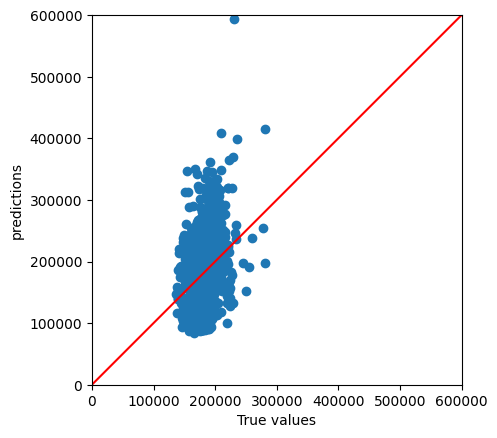

In [131]:
ax = plt.axes(aspect="equal")
plt.scatter(Y_test_all.reshape(-1), y_pred_lr.reshape(-1), label="Lin reg prediction")
plt.xlabel("True values")
plt.ylabel("predictions")
lims = [0, 600000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")